In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
sns.set_style("darkgrid")

In [27]:
l2_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/risultati_opt_l2.csv")
dropout_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/dropout.csv")
dropout_trials = dropout_trials.drop(index = 0)
dropout_trials = dropout_trials.reset_index()

In [32]:
def maximizer(data):

  best_data = []
  
  best_data.append(data[1]) #da rimettere a zero

  smaller = data[1] #da rimettere a zero

  
  for i in range(len(data)-1):
    
    if data[i+1] < smaller : 

      best_data.append(data[i+1])

      smaller = data[i+1]

    else:

      best_data.append(smaller)

  
  return best_data



l2_trials['best_value'] = maximizer(l2_trials['value'])
dropout_trials['best_value'] = maximizer(droput_trials['value'])

In [33]:
dropout_trials.head()

,index,number,value,datetime_start,datetime_complete,duration,params_#hidden,params_dense1,params_dense2,params_dense3,params_dense4,params_dropout,params_lr,state,best_value
0,1,1,0.289188,2021-01-02 15:50:06.720583,2021-01-02 15:56:57.705768,0 days 00:06:50.985185,3.0,224.0,112.0,48.0,NaN,0.320526,0.000284,COMPLETE,0.289188
1,2,2,0.296888,2021-01-02 15:56:57.811408,2021-01-02 16:01:55.431493,0 days 00:04:57.620085,4.0,176.0,64.0,32.0,48.0,0.331878,0.000664,COMPLETE,0.289188
2,3,3,0.398048,2021-01-02 16:01:55.521343,2021-01-02 16:05:26.242849,0 days 00:03:30.721506,4.0,160.0,16.0,112.0,16.0,0.275429,0.002871,COMPLETE,0.289188
3,4,4,0.480134,2021-01-02 16:05:26.338641,2021-01-02 16:11:33.603772,0 days 00:06:07.265131,4.0,80.0,16.0,16.0,16.0,0.276103,0.001835,COMPLETE,0.289188
4,5,5,0.296384,2021-01-02 16:11:33.691370,2021-01-02 16:15:39.098381,0 days 00:04:05.407011,3.0,128.0,48.0,80.0,NaN,0.219112,0.000717,COMPLETE,0.289188


In [30]:
l2_trials.head()

,number,value,datetime_start,datetime_complete,duration,params_#hidden,params_dense1,params_dense2,params_dense3,params_dense4,params_lambda,params_lr,state,best_value
0,0,0.339813,2021-01-02 15:54:26.009347,2021-01-02 16:01:48.539728,0 days 00:07:22.530381,3,224,112,48,NaN,0.004508,0.000284,COMPLETE,0.339813
1,1,0.352465,2021-01-02 16:01:48.605387,2021-01-02 16:08:39.457340,0 days 00:06:50.851953,4,176,64,32,48.0,0.005484,0.000664,COMPLETE,0.339813
2,2,0.321881,2021-01-02 16:08:39.516914,2021-01-02 16:12:44.333247,0 days 00:04:04.816333,4,160,16,112,16.0,0.002069,0.002871,COMPLETE,0.321881
3,3,0.319897,2021-01-02 16:12:44.393327,2021-01-02 16:19:49.279613,0 days 00:07:04.886286,4,80,16,16,16.0,0.002093,0.001835,COMPLETE,0.319897
4,4,0.301498,2021-01-02 16:19:49.346306,2021-01-02 16:24:47.409268,0 days 00:04:58.062962,3,128,48,80,NaN,0.000782,0.000717,COMPLETE,0.301498


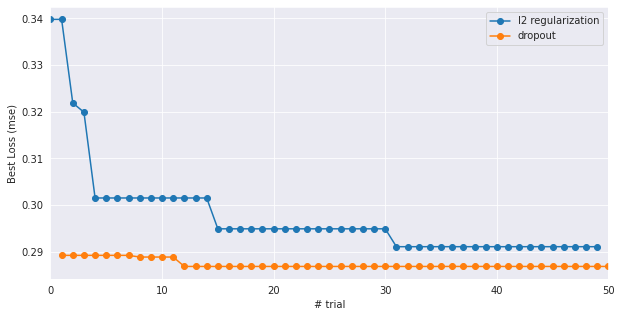

In [37]:
plt.figure(figsize = (10, 5))
plt.plot('number', 'best_value', data=l2_trials, linestyle='-', marker='o', label = "l2 regularization")
plt.plot('number', 'best_value', data=dropout_trials, linestyle='-', marker='o', label = "dropout")
plt.xlabel("# trial")
plt.ylabel("Best Loss (mse)")
plt.xlim(0, 50)
plt.legend()

In [56]:
### plot loss train vs loss val

perf_no_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l1.csv")
perf_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l1.csv")

perf_no_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l2.csv")
perf_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l2.csv")

perf_no_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_dropout.csv")
perf_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_dropout.csv")

In [ ]:
model_l2_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_opt_l2.h5")
model_l2_no_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_no_opt_l2.h5")

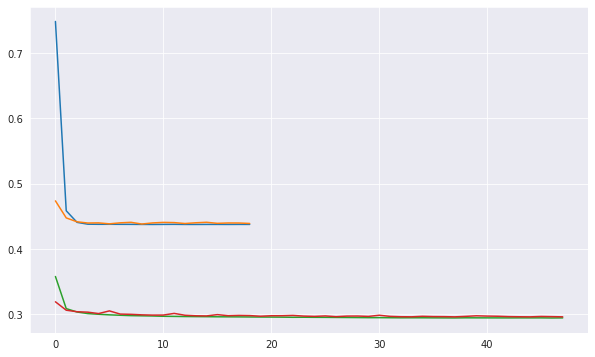

In [51]:
plt.figure(figsize = (10, 6))

plt.plot(perf_no_opt_l1['loss'])
plt.plot(perf_no_opt_l1['val_loss'])
plt.plot(perf_opt_l1['loss'])
plt.plot(perf_opt_l1['val_loss'])

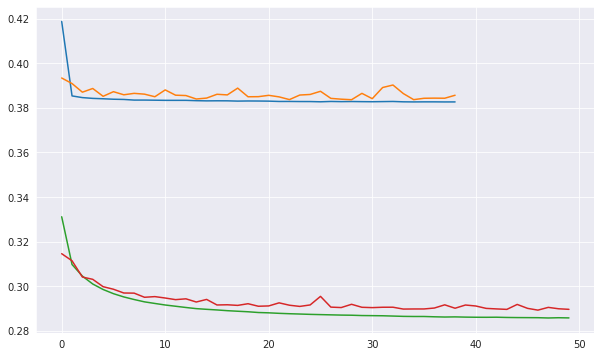

In [53]:
plt.figure(figsize = (10, 6))

plt.plot(perf_no_opt_l2['loss'])
plt.plot(perf_no_opt_l2['val_loss'])

plt.plot(perf_opt_l2['loss'])
plt.plot(perf_opt_l2['val_loss'])

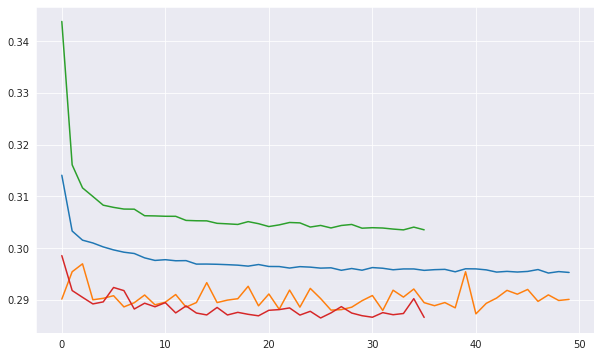

In [57]:
plt.figure(figsize = (10, 6))


plt.plot(perf_no_opt_dropout['loss'])
plt.plot(perf_no_opt_dropout['val_loss'])

plt.plot(perf_opt_drop['loss'])
plt.plot(perf_opt_dropout['val_loss'])

In [ ]:
model_l2_opt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               6720      
_________________________________________________________________
dense_5 (Dense)              (None, 112)               18032     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                7232      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 36,209
Trainable params: 36,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_l2_no_opt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               9408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________
